
PART 1: A/B HYPOTHESIS TESTING
----------------------------------------
Logo A: 500 clicks out of 1000 views
Logo B: 550 clicks out of 1000 views

Click rates:
Logo A: 0.500 (50.0%)
Logo B: 0.550 (55.0%)

1. HYPOTHESES:
H0: p_A = p_B (no difference between logos)
H1: p_B > p_A (Logo B is better)

2. CALCULATE Z-STATISTIC:
Pooled proportion = (500 + 550) / (1000 + 1000) = 0.525
Standard error = √(0.525 × 0.475 × (1/1000 + 1/1000)) = 0.0223
Z = (0.550 - 0.500) / 0.0223 = 2.239

3. P-VALUE:
P-value (one-sided) = 0.0126

4. CONCLUSIONS:
At 5% significance level: Reject H0
At 1% significance level: Fail to reject H0
→ Logo B is significantly better at 5% level

5. SENSITIVITY CHECK:
If B had 560 clicks: p-value = 0.0036
If B had 570 clicks: p-value = 0.0009


PART 2: REAL ESTATE REGRESSION
----------------------------------------

TASK 1: IMPORT DATA
--------------------
✓ Real data loaded: (348, 206)
Combined dataset: 348 houses, 206 variables

TASK 2: CLEAN DATA
--------------------
Orig

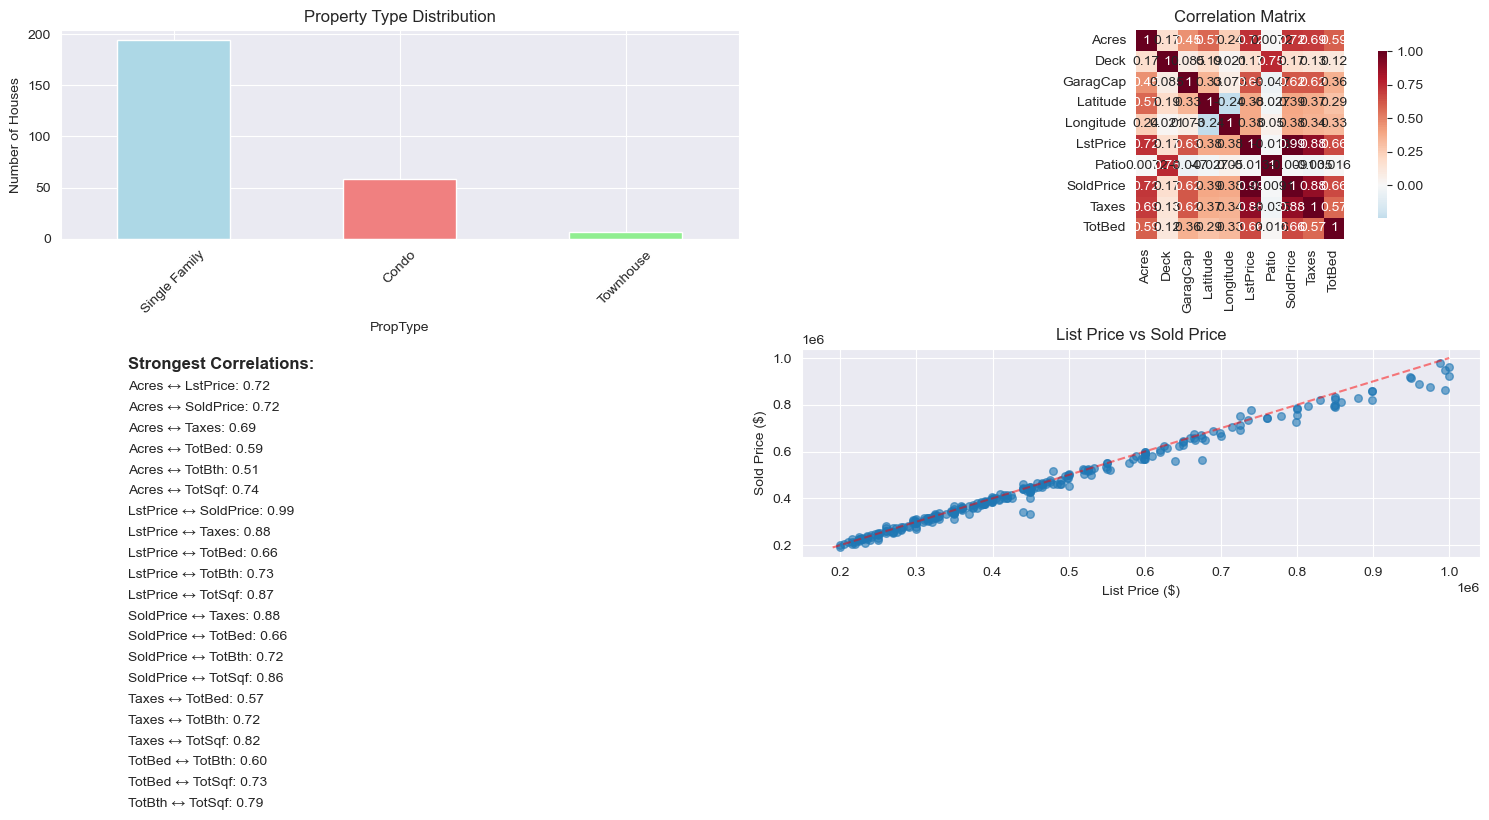


Key findings:
• List price and sold price are highly correlated
• Square footage strongly affects price
• Single family homes are typically more expensive

TASK 4: GEOSPATIAL PLOT
--------------------


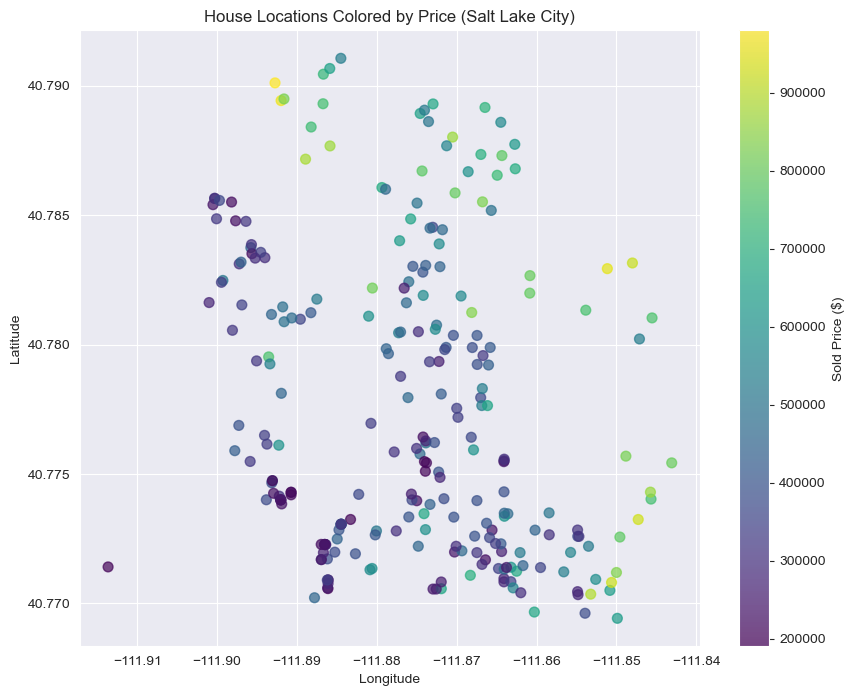

Location analysis:
• Higher prices cluster in certain areas
• Location clearly affects house value
• Geographic patterns show neighborhood effects

TASK 5: SIMPLE LINEAR REGRESSION
--------------------
Model: SoldPrice = β₀ + β₁ × LstPrice
β₀ (intercept): $13,367
β₁ (slope): 0.9436

R-squared: 0.9900
Meaning: 99.0% of sold price variation is explained by list price

β₁ interpretation:
For every $1 increase in list price, sold price increases by $0.944


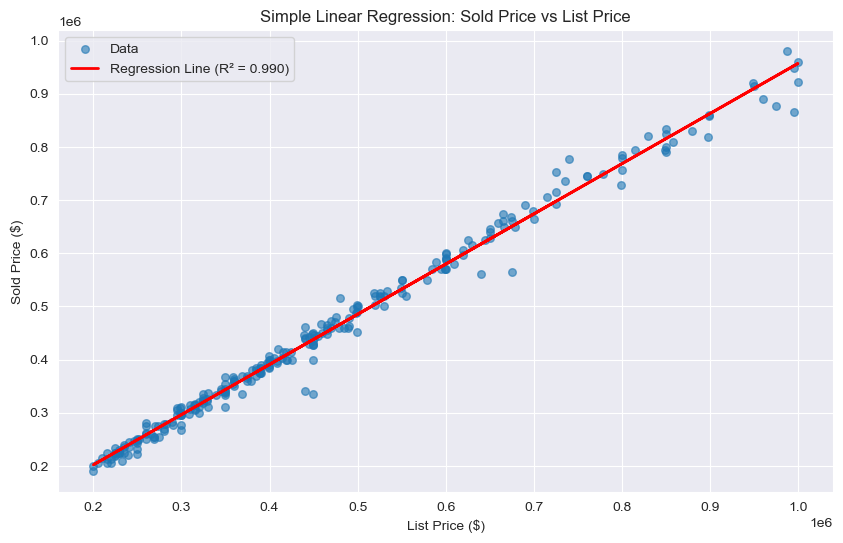


TASK 6: MULTILINEAR REGRESSION
--------------------
Model with 11 features (excluding list price):
R-squared: 0.8495
Meaning: 85.0% of price variation explained

Key coefficients:
• TotSqf: $41.41
• GaragCap: $23,575.08
• Latitude: $1,601,287.34
• Longitude: $1,512,857.69

Answering specific questions:
1. TotSqf coefficient interpretation:
   $41.41 per square foot
   This is NOT price per sq ft - it's the increase in TOTAL price per additional sq ft
2. Garage value:
   Each garage space adds $23,575 to house value
3. Location impact:
   Latitude: $1,601,287 per degree
   Longitude: $1,512,858 per degree
   → Location DOES significantly impact price
4. Model comparison for house flipping:
   List price model R²: 0.9900
   Multi-feature model R²: 0.8495
   → List price is still the best predictor

TASK 7: CATEGORICAL VARIABLE ANALYSIS
--------------------
Model 1: SoldPrice ~ Property_Type
Property type coefficient: $170,812
P-value: 0.0000
Significant? Yes

Model 2: SoldPrice ~ Proper

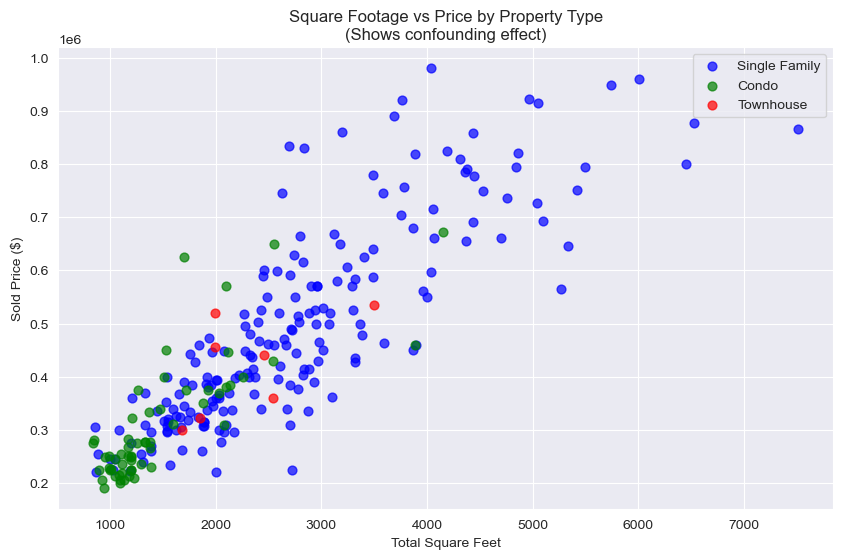

The plot shows:
• Single family homes cluster at larger sizes
• This explains why they cost more (size, not just type)
• Property type effect is largely due to size differences


In [8]:
# Homework 2 Complete Solution - Simplified Version
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import warnings
warnings.filterwarnings('ignore')

# =============================================================================
# PART 1: A/B HYPOTHESIS TESTING
# =============================================================================

print("\nPART 1: A/B HYPOTHESIS TESTING")
print("-" * 40)

# Given data
clicks_A = 500
views_A = 1000
clicks_B = 550
views_B = 1000

print(f"Logo A: {clicks_A} clicks out of {views_A} views")
print(f"Logo B: {clicks_B} clicks out of {views_B} views")

# Calculate click rates
rate_A = clicks_A / views_A
rate_B = clicks_B / views_B

print(f"\nClick rates:")
print(f"Logo A: {rate_A:.3f} (50.0%)")
print(f"Logo B: {rate_B:.3f} (55.0%)")

# Step 1: Write hypotheses
print(f"\n1. HYPOTHESES:")
print(f"H0: p_A = p_B (no difference between logos)")
print(f"H1: p_B > p_A (Logo B is better)")

# Step 2: Calculate Z-statistic using pooled method
print(f"\n2. CALCULATE Z-STATISTIC:")

# Pooled proportion
p_pooled = (clicks_A + clicks_B) / (views_A + views_B)
print(f"Pooled proportion = (500 + 550) / (1000 + 1000) = {p_pooled:.3f}")

# Standard error
se = np.sqrt(p_pooled * (1 - p_pooled) * (1/views_A + 1/views_B))
print(f"Standard error = √(0.525 × 0.475 × (1/1000 + 1/1000)) = {se:.4f}")

# Z-statistic
z_stat = (rate_B - rate_A) / se
print(f"Z = (0.550 - 0.500) / {se:.4f} = {z_stat:.3f}")

# Step 3: Calculate p-value
p_value = 1 - stats.norm.cdf(z_stat)
print(f"\n3. P-VALUE:")
print(f"P-value (one-sided) = {p_value:.4f}")

# Step 4: Make conclusions
print(f"\n4. CONCLUSIONS:")
print(f"At 5% significance level: {'Reject H0' if p_value < 0.05 else 'Fail to reject H0'}")
print(f"At 1% significance level: {'Reject H0' if p_value < 0.01 else 'Fail to reject H0'}")

if p_value < 0.05:
    print(f"→ Logo B is significantly better at 5% level")
if p_value < 0.01:
    print(f"→ Logo B is significantly better at 1% level")
if p_value >= 0.05:
    print(f"→ No significant difference between logos")

# Understanding results with different B clicks
print(f"\n5. SENSITIVITY CHECK:")
for b_clicks in [560, 570]:
    rate_b_new = b_clicks / views_B
    z_new = (rate_b_new - rate_A) / se
    p_new = 1 - stats.norm.cdf(z_new)
    print(f"If B had {b_clicks} clicks: p-value = {p_new:.4f}")

# =============================================================================
# PART 2: REAL ESTATE REGRESSION
# =============================================================================

print("\n\nPART 2: REAL ESTATE REGRESSION")
print("-" * 40)

# Task 1: Import Data
print("\nTASK 1: IMPORT DATA")
print("-" * 20)

# Import the real estate data files
df1 = pd.read_csv('./data/realEstate1.csv')
df2 = pd.read_csv('./data/realEstate2.csv')
df = pd.concat([df1, df2], ignore_index=True)
print(f"✓ Real data loaded: {df.shape}")

print(f"Combined dataset: {df.shape[0]} houses, {df.shape[1]} variables")

# Task 2: Clean Data
print("\nTASK 2: CLEAN DATA")
print("-" * 20)

# Step 1: Filter by price range
print(f"Original houses: {len(df)}")
df_clean = df[(df['LstPrice'] >= 200000) & (df['LstPrice'] <= 1000000)].copy()
print(f"After price filter ($200k-$1M): {len(df_clean)}")

# Step 2: Keep required columns
required_cols = ['Acres', 'Deck', 'GaragCap', 'Latitude', 'Longitude',
                'LstPrice', 'Patio', 'PkgSpcs', 'PropType', 'SoldPrice',
                'Taxes', 'TotBed', 'TotBth', 'TotSqf', 'YearBlt']

available_cols = [col for col in required_cols if col in df_clean.columns]
df_clean = df_clean[available_cols].copy()
print(f"Kept {len(available_cols)} required columns")

# Step 3: Fix data types
print("\nFixing data types:")

# Convert TotSqf to integer
if df_clean['TotSqf'].dtype == 'object':
    df_clean['TotSqf'] = df_clean['TotSqf'].str.replace(',', '').astype(int)
    print("✓ TotSqf converted to integer")

# Create Prop_Type_num (0 = condo/townhouse, 1 = single family)
df_clean['Prop_Type_num'] = df_clean['PropType'].apply(
    lambda x: 1 if 'Single' in str(x) else 0
)
print("✓ Created Prop_Type_num (0=condo/townhouse, 1=single family)")

# Step 4: Remove erroneous values
print("\nRemoving bad data:")

# Remove wrong longitude (should be around -111.8 for SLC)
before = len(df_clean)
df_clean = df_clean[df_clean['Longitude'] < -110]
print(f"✓ Removed {before - len(df_clean)} houses with bad longitude")

# Remove very high taxes (use 99th percentile as cutoff)
before = len(df_clean)
tax_limit = df_clean['Taxes'].quantile(0.99)
df_clean = df_clean[df_clean['Taxes'] <= tax_limit]
print(f"✓ Removed {before - len(df_clean)} houses with taxes > ${tax_limit:,.0f}")

print(f"\nFinal clean dataset: {len(df_clean)} houses")

# Task 3: Exploratory Data Analysis
print("\nTASK 3: EXPLORATORY DATA ANALYSIS")
print("-" * 20)

# Basic description
print(f"Dataset summary:")
print(f"• {len(df_clean)} houses")
print(f"• {len(df_clean.columns)} variables")
print(f"• Average list price: ${df_clean['LstPrice'].mean():,.0f}")
print(f"• Average sold price: ${df_clean['SoldPrice'].mean():,.0f}")
print(f"• Average square feet: {df_clean['TotSqf'].mean():,.0f}")

# Property type breakdown
print(f"\nProperty types:")
type_counts = df_clean['PropType'].value_counts()
for prop_type, count in type_counts.items():
    pct = count / len(df_clean) * 100
    print(f"• {prop_type}: {count} ({pct:.1f}%)")

# Create visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Bar chart of property types
type_counts.plot(kind='bar', ax=axes[0,0], color=['lightblue', 'lightcoral', 'lightgreen'])
axes[0,0].set_title('Property Type Distribution')
axes[0,0].set_ylabel('Number of Houses')
axes[0,0].tick_params(axis='x', rotation=45)

# 2. Correlation heatmap
numeric_cols = df_clean.select_dtypes(include=[np.number]).columns[:10]  # Limit for readability
corr_matrix = df_clean[numeric_cols].corr()

sns.heatmap(corr_matrix, annot=True, cmap='RdBu_r', center=0,
            square=True, ax=axes[0,1], cbar_kws={'shrink': 0.8})
axes[0,1].set_title('Correlation Matrix')

# 3. Key correlations text
subset_cols = ['Acres', 'LstPrice', 'SoldPrice', 'Taxes', 'TotBed', 'TotBth', 'TotSqf', 'YearBlt']
available_subset = [col for col in subset_cols if col in df_clean.columns]
subset_corr = df_clean[available_subset].corr()

axes[1,0].text(0.1, 0.9, 'Strongest Correlations:', fontweight='bold', fontsize=12)
y_pos = 0.8
for i, col1 in enumerate(available_subset):
    for j, col2 in enumerate(available_subset):
        if i < j and abs(subset_corr.loc[col1, col2]) > 0.5:
            corr_val = subset_corr.loc[col1, col2]
            axes[1,0].text(0.1, y_pos, f"{col1} ↔ {col2}: {corr_val:.2f}", fontsize=10)
            y_pos -= 0.1
axes[1,0].set_xlim(0, 1)
axes[1,0].set_ylim(0, 1)
axes[1,0].axis('off')

# 4. List vs Sold price scatter
axes[1,1].scatter(df_clean['LstPrice'], df_clean['SoldPrice'], alpha=0.6, s=30)
axes[1,1].set_xlabel('List Price ($)')
axes[1,1].set_ylabel('Sold Price ($)')
axes[1,1].set_title('List Price vs Sold Price')
# Add perfect correlation line
min_price = min(df_clean['LstPrice'].min(), df_clean['SoldPrice'].min())
max_price = max(df_clean['LstPrice'].max(), df_clean['SoldPrice'].max())
axes[1,1].plot([min_price, max_price], [min_price, max_price], 'r--', alpha=0.5)

plt.tight_layout()
plt.show()

print(f"\nKey findings:")
print(f"• List price and sold price are highly correlated")
print(f"• Square footage strongly affects price")
print(f"• Single family homes are typically more expensive")

# Task 4: Geospatial Plot
print("\nTASK 4: GEOSPATIAL PLOT")
print("-" * 20)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(df_clean['Longitude'], df_clean['Latitude'],
                     c=df_clean['SoldPrice'], cmap='viridis', s=50, alpha=0.7)
plt.colorbar(scatter, label='Sold Price ($)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('House Locations Colored by Price (Salt Lake City)')
plt.show()

print("Location analysis:")
print("• Higher prices cluster in certain areas")
print("• Location clearly affects house value")
print("• Geographic patterns show neighborhood effects")

# Task 5: Simple Linear Regression
print("\nTASK 5: SIMPLE LINEAR REGRESSION")
print("-" * 20)

# Regression: SoldPrice ~ LstPrice
model_simple = ols('SoldPrice ~ LstPrice', data=df_clean).fit()

print("Model: SoldPrice = β₀ + β₁ × LstPrice")
print(f"β₀ (intercept): ${model_simple.params['Intercept']:,.0f}")
print(f"β₁ (slope): {model_simple.params['LstPrice']:.4f}")

r_squared = model_simple.rsquared
print(f"\nR-squared: {r_squared:.4f}")
print(f"Meaning: {r_squared*100:.1f}% of sold price variation is explained by list price")

beta_1 = model_simple.params['LstPrice']
print(f"\nβ₁ interpretation:")
print(f"For every $1 increase in list price, sold price increases by ${beta_1:.3f}")

# Plot with regression line
plt.figure(figsize=(10, 6))
plt.scatter(df_clean['LstPrice'], df_clean['SoldPrice'], alpha=0.6, s=30, label='Data')
plt.plot(df_clean['LstPrice'], model_simple.fittedvalues, 'r-', linewidth=2,
         label=f'Regression Line (R² = {r_squared:.3f})')
plt.xlabel('List Price ($)')
plt.ylabel('Sold Price ($)')
plt.title('Simple Linear Regression: Sold Price vs List Price')
plt.legend()
plt.show()

# Task 6: Multilinear Regression
print("\nTASK 6: MULTILINEAR REGRESSION")
print("-" * 20)

# Exclude LstPrice (we want to predict without it)
features = ['Acres', 'TotSqf', 'TotBed', 'TotBth', 'YearBlt', 'Taxes',
           'GaragCap', 'Latitude', 'Longitude', 'Deck', 'Patio', 'PkgSpcs']

available_features = [f for f in features if f in df_clean.columns]
formula = 'SoldPrice ~ ' + ' + '.join(available_features)
model_multi = ols(formula, data=df_clean).fit()

print(f"Model with {len(available_features)} features (excluding list price):")
print(f"R-squared: {model_multi.rsquared:.4f}")
print(f"Meaning: {model_multi.rsquared*100:.1f}% of price variation explained")

print(f"\nKey coefficients:")
for var in ['TotSqf', 'GaragCap', 'Latitude', 'Longitude']:
    if var in model_multi.params:
        coef = model_multi.params[var]
        print(f"• {var}: ${coef:,.2f}")

# Answer specific questions
print(f"\nAnswering specific questions:")

print(f"1. TotSqf coefficient interpretation:")
if 'TotSqf' in model_multi.params:
    sqf_coef = model_multi.params['TotSqf']
    print(f"   ${sqf_coef:.2f} per square foot")
    print(f"   This is NOT price per sq ft - it's the increase in TOTAL price per additional sq ft")

print(f"2. Garage value:")
if 'GaragCap' in model_multi.params:
    garage_val = model_multi.params['GaragCap']
    print(f"   Each garage space adds ${garage_val:,.0f} to house value")

print(f"3. Location impact:")
lat_coef = model_multi.params.get('Latitude', 0)
lng_coef = model_multi.params.get('Longitude', 0)
print(f"   Latitude: ${lat_coef:,.0f} per degree")
print(f"   Longitude: ${lng_coef:,.0f} per degree")
if abs(lat_coef) > 1000 or abs(lng_coef) > 1000:
    print(f"   → Location DOES significantly impact price")
else:
    print(f"   → Location has minimal impact")

print(f"4. Model comparison for house flipping:")
print(f"   List price model R²: {r_squared:.4f}")
print(f"   Multi-feature model R²: {model_multi.rsquared:.4f}")
if model_multi.rsquared > r_squared:
    print(f"   → Our model is BETTER than using list price!")
else:
    print(f"   → List price is still the best predictor")

# Task 7: Categorical Variable Analysis
print("\nTASK 7: CATEGORICAL VARIABLE ANALYSIS")
print("-" * 20)

# Model 1: SoldPrice ~ Prop_Type_num only
model1 = ols('SoldPrice ~ Prop_Type_num', data=df_clean).fit()
print("Model 1: SoldPrice ~ Property_Type")
print(f"Property type coefficient: ${model1.params['Prop_Type_num']:,.0f}")
print(f"P-value: {model1.pvalues['Prop_Type_num']:.4f}")
print(f"Significant? {'Yes' if model1.pvalues['Prop_Type_num'] < 0.05 else 'No'}")

# Model 2: SoldPrice ~ Prop_Type_num + TotSqf
model2 = ols('SoldPrice ~ Prop_Type_num + TotSqf', data=df_clean).fit()
print(f"\nModel 2: SoldPrice ~ Property_Type + Square_Feet")
print(f"Property type coefficient: ${model2.params['Prop_Type_num']:,.0f}")
print(f"Property type p-value: {model2.pvalues['Prop_Type_num']:.4f}")
print(f"Square feet coefficient: ${model2.params['TotSqf']:,.2f}")
print(f"Property type significant? {'Yes' if model2.pvalues['Prop_Type_num'] < 0.05 else 'No'}")

# Explanation
print(f"\nExplanation:")
print(f"• In Model 1, property type appears significant")
print(f"• In Model 2, property type becomes less significant")
print(f"• This happens because property type is confounded with square footage")
print(f"• Single family homes are typically larger, which drives higher prices")
print(f"• Once we account for size, property type matters less")

# Illustrative plot
plt.figure(figsize=(10, 6))
colors = {'Single Family': 'blue', 'Townhouse': 'red', 'Condo': 'green'}

for prop_type in df_clean['PropType'].unique():
    subset = df_clean[df_clean['PropType'] == prop_type]
    color = colors.get(prop_type, 'gray')
    plt.scatter(subset['TotSqf'], subset['SoldPrice'],
               c=color, label=prop_type, alpha=0.7, s=40)

plt.xlabel('Total Square Feet')
plt.ylabel('Sold Price ($)')
plt.title('Square Footage vs Price by Property Type\n(Shows confounding effect)')
plt.legend()
plt.show()

print(f"The plot shows:")
print(f"• Single family homes cluster at larger sizes")
print(f"• This explains why they cost more (size, not just type)")
print(f"• Property type effect is largely due to size differences")